In [1]:
"""Plot monthly SL variance explained by adjoint sensitivities, as a function of frequency range."""


import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys
from os.path import join,expanduser

import sys
sys.path.append(join(expanduser('~'),'Documents','py_functions'))
from filter_functions import *


user_home_dir = expanduser('~')

# grid file
grid_filename = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC','ECCO_L4_GEOMETRY_LLC0090GRID_V4R4',\
                     'GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
ds_grid = xr.open_dataset(grid_filename)


# # adjoint sensitivities location
adj_sens_loc = 'WesternGulfCoast'

# # prediction location
place_id = 'WesternGulfCoast'

# # prediction location is regional average or point?
place_is_regionavg = True

# # years included in prediction
years_to_predict = np.arange(1997,2018)


# # variance explained in cell or per area?
per_area_opt = True


# # forcing case identifier
difference_opt = False                 # True if differencing two sets of forcing impacts
if difference_opt:
    case_id = 'ERA5_CESM_HRDP_minus_DPLE'
    case_id_0 = 'ERA5_CESM_DPLE_ensmean'
    case_id_1 = 'ERA5_CESM_HRDP_ensmean'
else:
    case_id = 'ECCO_JRA55do'

# # variance explained of reconstruction ('reconstr'), 'model', or obs ('tgauge','altim')
varexp_type = 'reconstr'

if varexp_type == 'model':
    # for clear results, the lead time range should be <= the interval between prediction runs
    lead_time_range_days = np.array([365,1096])
    predrange_id = '1-3yr'

# # lead extent identifier
maxlead_id = '5yr'

# # year range identifier
year_range_id = "_".join([str(year) for year in years_to_predict[[0,-1]]])

# # filename with contribution time series from cells/regions
cell_scheme = 'withtrend_nest10.3.1'
varexp_dir = join(user_home_dir,'Downloads','ECCO_v4r4_adjoint','forcing_stats')
if difference_opt:
    varexp_0_filename = join(varexp_dir,case_id_0+'_impact_'+varexp_type+'_'+place_id+'_'\
                               +cell_scheme+'_'+maxlead_id+'_'+year_range_id)
    varexp_1_filename = join(varexp_dir,case_id_1+'_impact_'+varexp_type+'_'+place_id+'_'\
                               +cell_scheme+'_'+maxlead_id+'_'+year_range_id)
    ds_varexp_0 = xr.open_zarr(varexp_0_filename)
    ds_varexp_1 = xr.open_zarr(varexp_1_filename)
    ds_varexp = ds_varexp_1
else:
    if varexp_type == 'reconstr':
        varexp_filename = join(varexp_dir,case_id+'_impact_altim_'+place_id+'_'\
                               +cell_scheme+'_'+maxlead_id+'_'+year_range_id)
    else:
        varexp_filename = join(varexp_dir,case_id+'_impact_'+varexp_type+'_'+place_id+'_'\
                               +cell_scheme+'_'+maxlead_id+'_'+year_range_id)
    ds_varexp = xr.open_zarr(varexp_filename)


# tide gauge locations and IDs
tidegauge_lon = {'Key West': -81.808, 'Fort Myers': -81.872, 'St. Petersburg': -82.627, 'Cedar Key': -83.032,\
                 'Apalachicola': -84.98, 'Pensacola': -87.212, 'Grand Isle': -89.957, 'Galveston': -94.793,\
                 'Rockport': -97.047, 'Port Isabel': -97.215}
tidegauge_lat = {'Key West': 24.555, 'Fort Myers': 26.648, 'St. Petersburg': 27.762, 'Cedar Key': 29.135,\
                 'Apalachicola': 29.725, 'Pensacola': 30.405, 'Grand Isle': 29.263, 'Galveston': 29.31,\
                 'Rockport': 28.022, 'Port Isabel': 26.062}
# tidegauge_psmsl_id = {'Key West': 188, 'St. Petersburg': 520, 'Pensacola': 246, 'Grand Isle': 526,\
#                       'Galveston': 161, 'Port Isabel': 497}



# place_id = varexp_filename.split('_')[-2]

In [2]:
ds_varexp

<xarray.Dataset> Size: 6GB
Dimensions:                        (tile: 13, j: 90, i: 90, cell: 4683,
                                    forc: 4, pred_month: 12, pred_year: 21,
                                    sens_tval: 266, lead_mo: 60)
Coordinates: (12/16)
    XC                             (tile, j, i) float32 421kB dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    XC_cell                        (cell) float64 37kB dask.array<chunksize=(4683,), meta=np.ndarray>
    XG                             (tile, j, i) float32 421kB dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    XG_cell                        (cell) float64 37kB dask.array<chunksize=(4683,), meta=np.ndarray>
    YC                             (tile, j, i) float32 421kB dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YC_cell                        (cell) float64 37kB dask.array<chunksize=(4683,), meta=np.ndarray>
    ...                             ...
    forc_time                      (pred_month, sens_tval, pred_year) datetime64[ns] 536kB dask.array<chunksize=(6, 266, 21), meta=np.ndarray>
  * pred_month                     (pred_month) int32 48B 1 2 3 4 ... 9 10 11 12
    pred_time                      (pred_month, pred_year) datetime64[ns] 2kB dask.array<chunksize=(12, 21), meta=np.ndarray>
  * pred_year                      (pred_year) int32 84B 1997 1998 ... 2016 2017
    sens_time                      (pred_month, sens_tval) datetime64[ns] 26kB dask.array<chunksize=(12, 266), meta=np.ndarray>
    sens_time_end                  (pred_month, sens_tval) datetime64[ns] 26kB dask.array<chunksize=(12, 266), meta=np.ndarray>
Dimensions without coordinates: tile, j, i, cell, sens_tval, lead_mo
Data variables: (12/14)
    all_impact_forc_attimes        (forc, pred_month, pred_year) float32 4kB dask.array<chunksize=(4, 12, 21), meta=np.ndarray>
    all_impact_senststep_attimes   (pred_month, sens_tval, pred_year) float32 268kB dask.array<chunksize=(6, 266, 21), meta=np.ndarray>
    cum_frac_varexp_cell           (forc, pred_month, sens_tval, cell) float64 478MB dask.array<chunksize=(1, 3, 67, 1171), meta=np.ndarray>
    cum_frac_varexp_cell_allforc   (pred_month, sens_tval, cell) float64 120MB dask.array<chunksize=(2, 67, 1171), meta=np.ndarray>
    frac_varexp_cell               (forc, pred_month, sens_tval, cell) float64 478MB dask.array<chunksize=(1, 3, 67, 1171), meta=np.ndarray>
    frac_varexp_cell_allforc       (pred_month, sens_tval, cell) float64 120MB dask.array<chunksize=(2, 67, 1171), meta=np.ndarray>
    ...                             ...
    obs_tseries_var                (pred_month) float64 96B dask.array<chunksize=(12,), meta=np.ndarray>
    predict_lead_mo                (pred_month, pred_year, lead_mo) float64 121kB dask.array<chunksize=(12, 21, 60), meta=np.ndarray>
    preinit_cell_impact_attimes    (forc, pred_month, sens_tval, pred_year, cell) float32 5GB dask.array<chunksize=(1, 2, 67, 6, 1171), meta=np.ndarray>
    rA_cell                        (cell) float64 37kB dask.array<chunksize=(4683,), meta=np.ndarray>
    reconstr_total                 (pred_month, pred_year) float32 1kB dask.array<chunksize=(12, 21), meta=np.ndarray>
    reconstr_var                   (pred_month) float64 96B dask.array<chunksize=(12,), meta=np.ndarray>

In [3]:
%pdb on

# band-pass filter contribution time series for a given period/frequency range
# high_freq_bound = 1/48
high_freq_bound = 1/(1*365.24)
low_freq_bound = 1/(10*365.24)
# low_freq_bound = 1/(45*365.24)
freq_range_name = '1-10 yr'

edge_handling_opt = 0     # 0 = no edge masking, 1 = edge masking


if 'postinit_cell_impact_attimes' in ds_varexp:
    init_tstep = 0
else:
    init_tstep = ds_varexp.sizes['sens_tval']


def cell_impacts_bandpass(ds_varexp,varexp_type,high_freq_bound,low_freq_bound,init_tstep):
    # aggregate impacts up through week/time step
    # init_tstep = ds_varexp.sizes['sens_tval'] - 53
    
    cell_impacts = np.reshape(ds_varexp.preinit_cell_impact_attimes.isel(sens_tval=slice(0,init_tstep+1))\
                                  .sum('sens_tval').transpose('forc','pred_year','pred_month','cell')\
                                   .values,(ds_varexp.sizes['forc'],-1,ds_varexp.sizes['cell']))
    
    if (('postinit_cell_impact_attimes' in ds_varexp) and (init_tstep < ds_varexp.sizes['sens_tval'] - 1)):
        curr_latest_init_times = ds_varexp.forc_time.isel(sens_tval=init_tstep) + np.timedelta64(6,'D')
        init_times_attstep = ds_varexp.postinit_init_time.where((ds_varexp.postinit_init_time - curr_latest_init_times)\
                                      .values <= np.timedelta64(0,'D'),np.datetime64('1900-01-01','ns'))
        closest_init_time = init_times_attstep.max(dim=['lead_num','sens_tval'])
        closest_init_time_mask = (np.abs(ds_varexp.postinit_init_time - closest_init_time) < np.timedelta64(1,'D'))
        postinit_cell_impacts = np.reshape((closest_init_time_mask*ds_varexp.postinit_cell_impact_attimes)\
                                                    .isel(sens_tval=slice(init_tstep+1,None))\
                                                    .sum(['lead_num','sens_tval'])\
                                                    .transpose('forc','pred_year','pred_month','cell').values,\
                                    (ds_varexp.sizes['forc'],-1,ds_varexp.sizes['cell']))
        cell_impacts += postinit_cell_impacts

    if varexp_type == 'reconstr':
        base_tseries_bp,base_tseries_trendline = bandpass_err_fcn(ds_varexp.reconstr_total.values.transpose().flatten(),\
                                            axis=-1,delta_dim=365.24/12,\
                                            low_bound=low_freq_bound,\
                                            high_bound=high_freq_bound,\
                                            power_cutoff_opt=1,steepness_factor=2,\
                                            trend_handling_opt=0,\
                                            edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
    elif varexp_type == 'model':        
        lead_time_range = lead_time_range_days.astype('timedelta64[D]')        
        
        def postinit_ref_in_leadrange(ds,lead_time_range):
            postinit_ref_lead_time = (ds.pred_time - ds.model_tseries_init_time)\
                                        .transpose('lead_num','pred_month','pred_year')
            ref_in_lead_time_range = np.logical_and(postinit_ref_lead_time.values >= lead_time_range[0],\
                                                    postinit_ref_lead_time.values < lead_time_range[-1])
            ref_in_lead_time_range = xr.DataArray(ref_in_lead_time_range,dims=['lead_num','pred_month','pred_year'])
            ref_tseries_sortmonth_in_leadrange = ((ref_in_lead_time_range*ds.model_tseries_sortmonth).sum('lead_num')/\
                                                    (ref_in_lead_time_range.sum('lead_num')))\
                                                    .transpose('pred_month','pred_year')
            ref_init_in_leadrange = ((ref_in_lead_time_range*ds.model_tseries_init_time.astype('float64'))\
                                              .sum('lead_num')/\
                                                    (ref_in_lead_time_range.sum('lead_num')))\
                                                    .astype(ds.model_tseries_init_time.dtype)\
                                                    .transpose('pred_month','pred_year')
        
            return ref_tseries_sortmonth_in_leadrange,ref_init_in_leadrange
        
        model_tseries_sortmonth,model_tseries_init_in_leadrange = \
                            postinit_ref_in_leadrange(ds_varexp,lead_time_range)
        # start_year = np.int64(year_range_id[:4])
        # model_tseries_sortmonth = model_tseries_sortmonth[:,\
        #                                                 (start_year-ds_varexp.pred_year[0].values):]
        # model_tseries_init_in_leadrange = model_tseries_init_in_leadrange[:,\
        #                                                 (start_year-ds_varexp.pred_year[0].values):]
        base_tseries_bp,base_tseries_trendline = bandpass_err_fcn(model_tseries_sortmonth.values.transpose().flatten(),\
                                                axis=-1,delta_dim=365.24/12,\
                                                low_bound=low_freq_bound,\
                                                high_bound=high_freq_bound,\
                                                power_cutoff_opt=1,steepness_factor=2,\
                                                trend_handling_opt=0,\
                                                edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)
    else:
        base_tseries_bp,base_tseries_trendline = bandpass_err_fcn(\
                                                ds_varexp.obs_tseries_sortmonth.values.transpose().flatten(),\
                                                axis=-1,delta_dim=365.24/12,\
                                                low_bound=low_freq_bound,\
                                                high_bound=high_freq_bound,\
                                                power_cutoff_opt=1,steepness_factor=2,\
                                                trend_handling_opt=0,\
                                                edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)

    cell_impacts_bp,cell_impacts_trendline = bandpass_err_fcn(cell_impacts,\
                                                    axis=1,delta_dim=365.24/12,\
                                                    low_bound=low_freq_bound,\
                                                    high_bound=high_freq_bound,\
                                                    power_cutoff_opt=1,steepness_factor=2,\
                                                    trend_handling_opt=0,\
                                                    edge_handling_opt=edge_handling_opt,uneven_edge_handling_opt=0)

    return cell_impacts_bp,cell_impacts_trendline,\
            base_tseries_bp,base_tseries_trendline


if difference_opt:
    cell_impacts_bp_0,cell_impacts_trendline_0,\
        base_tseries_bp_0,base_tseries_trendline_0\
         = cell_impacts_bandpass(ds_varexp_0,varexp_type,high_freq_bound,low_freq_bound,init_tstep)
    cell_impacts_bp_1,cell_impacts_trendline_1,\
        base_tseries_bp_1,base_tseries_trendline_1\
         = cell_impacts_bandpass(ds_varexp_1,varexp_type,high_freq_bound,low_freq_bound,init_tstep)
    cell_impacts_bp = cell_impacts_bp_1 - cell_impacts_bp_0
    cell_impacts_trendline = cell_impacts_trendline_1 - cell_impacts_trendline_0
    if varexp_type in ['reconstr','model']:
        base_tseries_bp = base_tseries_bp_1 - base_tseries_bp_0
        base_tseries_trendline = base_tseries_trendline_1 - base_tseries_trendline_0
    else:
        base_tseries_bp = base_tseries_bp_1
        base_tseries_trendline = base_tseries_trendline_1
else:
    cell_impacts_bp,cell_impacts_trendline,\
        base_tseries_bp,base_tseries_trendline\
         = cell_impacts_bandpass(ds_varexp,varexp_type,high_freq_bound,low_freq_bound,init_tstep)

cell_impacts_allforc_bp = np.nansum(cell_impacts_bp,axis=0)
cell_impacts_allforc_trendline = np.nansum(cell_impacts_trendline,axis=0)

Automatic pdb calling has been turned ON


C:\Users\adelman\Documents\py_functions\filter_functions.py:45: RuntimeWarning: divide by zero encountered in log
  bandpass_filter = 0.5*(special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(low_bound/half_power_adj))) - special.erf(steepness_factor*(np.log(np.abs(f_vec)) - np.log(high_bound*half_power_adj))))


In [4]:
def varexp_compute(base_tseries_array,contrib_tseries_array,axis):
    base_nan_mask = np.logical_and(~np.isnan(base_tseries_array),~np.isinf(base_tseries_array))
    contrib_nan_mask = np.logical_and(~np.isnan(contrib_tseries_array),~np.isinf(contrib_tseries_array))
    nan_mask = np.logical_and(base_nan_mask,contrib_nan_mask)
    
    # broadcast to same shape
    base_tseries_array = np.ones(nan_mask.shape)*base_tseries_array
    contrib_tseries_array = np.ones(nan_mask.shape)*contrib_tseries_array
    
    base_tseries_array -= (np.nansum(nan_mask*base_tseries_array,axis=axis,keepdims=True)/\
                           np.nansum(nan_mask,axis=axis,keepdims=True))
    contrib_tseries_array -= (np.nansum(nan_mask*contrib_tseries_array,axis=axis,keepdims=True)/\
                              np.nansum(nan_mask,axis=axis,keepdims=True))
    varexp_array = 1 - (np.nansum(nan_mask*((base_tseries_array - contrib_tseries_array)**2),axis=axis)/\
                        np.nansum(nan_mask*(base_tseries_array**2),axis=axis))
    
    return varexp_array


cell_impacts_varexp = varexp_compute(np.expand_dims(base_tseries_bp,axis=(0,-1)),cell_impacts_bp,axis=1)
cell_impacts_allforc_varexp = varexp_compute(np.expand_dims(base_tseries_bp,axis=(0,-1)),\
                                                 cell_impacts_allforc_bp,axis=1)


def normalize_perarea(curr_array,ds_varexp):
    curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
    return curr_array_perarea

if per_area_opt:
    cell_impacts_varexp = normalize_perarea(cell_impacts_varexp,ds_varexp)
    cell_impacts_allforc_varexp = normalize_perarea(cell_impacts_allforc_varexp,ds_varexp)


cell_impacts_varexp_ecco_grid = np.empty(cell_impacts_varexp.shape[:-1]\
                                                  +ds_varexp.cell_indexing.shape)
cell_impacts_allforc_varexp_ecco_grid = np.empty(cell_impacts_allforc_varexp.shape[:-1]\
                                                  +ds_varexp.cell_indexing.shape)

for cell_ind in range(ds_varexp.sizes['cell']):
    ecco_grid_ind = np.logical_and(ds_varexp.cell_indexing.values == cell_ind,\
                                   ds_grid.hFacC.isel(k=0).values > 0.5).nonzero()
    cell_impacts_varexp_ecco_grid[(slice(None),)+ecco_grid_ind]\
                                    = cell_impacts_varexp[:,[cell_ind]]
    cell_impacts_allforc_varexp_ecco_grid[(slice(None),)+ecco_grid_ind]\
                                    = cell_impacts_allforc_varexp[:,[cell_ind]]

C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:10: RuntimeWarning: invalid value encountered in divide
  base_tseries_array -= (np.nansum(nan_mask*base_tseries_array,axis=axis,keepdims=True)/\
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:12: RuntimeWarning: invalid value encountered in divide
  contrib_tseries_array -= (np.nansum(nan_mask*contrib_tseries_array,axis=axis,keepdims=True)/\
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:14: RuntimeWarning: invalid value encountered in divide
  varexp_array = 1 - (np.nansum(nan_mask*((base_tseries_array - contrib_tseries_array)**2),axis=axis)/\
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:26: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)


In [5]:
# incorporate single cell contributions from other zarr stores/archives

supplemental_store_list = [join(varexp_dir,case_id+'_impact_altim_'+place_id+'_withtrend_NAtlonly_'\
                                +maxlead_id+'_'+year_range_id),\
                           join(varexp_dir,case_id+'_impact_altim_'+place_id+'_withtrend_midNEAtlonly_'\
                                +maxlead_id+'_'+year_range_id),\
                           join(varexp_dir,case_id+'_impact_altim_'+place_id+'_withtrend_NMedonly_'\
                                +maxlead_id+'_'+year_range_id),\
                           join(varexp_dir,case_id+'_impact_altim_'+place_id+'_withtrend_tropicsonly_'\
                                +maxlead_id+'_'+year_range_id)]

def single_index_mapping(ds_curr):
    curr_tile_ind = np.array([],dtype=np.int64)
    curr_j_ind = np.array([],dtype=np.int64)
    curr_i_ind = np.array([],dtype=np.int64)
    single_so_far = True
    for curr_cell_ind in range(ds_curr.sizes['cell']):
        curr_ecco_grid_ind = (ds_curr.cell_indexing.values == curr_cell_ind).nonzero()
        if len(curr_ecco_grid_ind[0]) == 1:
            curr_tile_ind = np.append(curr_tile_ind,curr_ecco_grid_ind[0])
            curr_j_ind = np.append(curr_j_ind,curr_ecco_grid_ind[1])
            curr_i_ind = np.append(curr_i_ind,curr_ecco_grid_ind[2])
            if not single_so_far:
                import pdb
                pdb.set_trace()
        elif len(curr_ecco_grid_ind[0]) > 1:
            single_so_far = False

    curr_ind_tuple = (curr_tile_ind,curr_j_ind,curr_i_ind)

    return curr_ind_tuple


# fill in values from supplemental stores/archives
supplemental_ind_tuples_dict = {}
for store in supplemental_store_list:
    ds_curr = xr.open_mfdataset(store,engine='zarr')
    curr_ind_tuple = single_index_mapping(ds_curr)
    supplemental_ind_tuples_dict[store] = curr_ind_tuple

    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        curr_cell_impacts_bp,curr_cell_impacts_trendline,\
            _,_\
             = cell_impacts_bandpass(ds_curr,varexp_type,high_freq_bound,low_freq_bound,init_tstep)
        
        curr_cell_impacts_allforc_bp = np.nansum(curr_cell_impacts_bp,axis=0)
        curr_cell_impacts_allforc_trendline = np.nansum(curr_cell_impacts_trendline,axis=0)
        
        curr_cell_impacts_varexp = varexp_compute(np.expand_dims(base_tseries_bp,axis=(0,-1)),curr_cell_impacts_bp,axis=1)
        curr_cell_impacts_allforc_varexp = varexp_compute(np.expand_dims(base_tseries_bp,axis=(0,-1)),\
                                                             curr_cell_impacts_allforc_bp,axis=1)
    
    if per_area_opt:
        curr_cell_impacts_varexp = normalize_perarea(curr_cell_impacts_varexp,ds_curr)
        curr_cell_impacts_allforc_varexp = normalize_perarea(curr_cell_impacts_allforc_varexp,ds_curr)

    cell_impacts_varexp_ecco_grid[(slice(None),)+curr_ind_tuple]\
                                    = curr_cell_impacts_varexp[:,:len(curr_ind_tuple[0])]
    cell_impacts_allforc_varexp_ecco_grid[(slice(None),)+curr_ind_tuple]\
                                    = curr_cell_impacts_allforc_varexp[:,:len(curr_ind_tuple[0])]

C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:26: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:26: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:26: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\1051277456.py:26: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)


In [6]:
# if place_id in ['EasternGulfCoast','WesternGulfCoast','GulfCoast']:
#     place_is_regionavg = True
# else:
#     place_is_regionavg = False

if place_is_regionavg:
    mask_unshaped = np.fromfile(join(expanduser('~'),'Downloads','ECCO_v4r4_adjoint',\
                                     'adjoint_sensitivities',place_id,\
                                'mask_'+place_id+'.bin'),dtype='>f4')
    mask_regionavg = np.empty((13,90,90)).astype('float32')
    mask_regionavg[:7,:,:] = np.reshape(mask_unshaped[:(7*90*90)],(7,90,90))
    mask_rot = np.reshape(mask_unshaped[(7*90*90):],(180,270))
    for tile_ind in range(7,10):
        mask_regionavg[tile_ind,:,:] = mask_rot[:90,90*(tile_ind-7):90*(tile_ind-6)]
    for tile_ind in range(10,13):
        mask_regionavg[tile_ind,:,:] = mask_rot[90:,90*(tile_ind-10):90*(tile_ind-9)]

In [7]:
import ecco_v4_py as ecco

cell_impacts_varexp_latlon_grid = np.empty(cell_impacts_varexp_ecco_grid.shape[:-3]+(1800,3600))
for forc_num in range(cell_impacts_varexp_ecco_grid.shape[0]):
    lon_centers_grid,lat_centers_grid,\
    lon_edges_grid,lat_edges_grid,\
    cell_impacts_varexp_latlon_grid[forc_num,:,:] = \
                                    ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
                                                          cell_impacts_varexp_ecco_grid[forc_num,:,:,:],\
                                                          new_grid_min_lat=-90,new_grid_max_lat=90,\
                                                          new_grid_delta_lat=.1,\
                                                          new_grid_min_lon=-180,new_grid_max_lon=180,\
                                                          new_grid_delta_lon=.1,\
                                                          mapping_method='nearest_neighbor')

# if per_area_opt == False:
#     lon_centers_grid,lat_centers_grid,\
#     lon_edges_grid,lat_edges_grid,\
#     cum_allforc_frac_varexp_latlon_grid = ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
#                                                           cum_allforc_frac_varexp_ecco_grid,\
#                                                           new_grid_min_lat=-90,new_grid_max_lat=90,\
#                                                           new_grid_delta_lat=.1,\
#                                                           new_grid_min_lon=-180,new_grid_max_lon=180,\
#                                                           new_grid_delta_lon=.1,\
#                                                           mapping_method='nearest_neighbor')
# else:
#     lon_centers_grid,lat_centers_grid,\
#     lon_edges_grid,lat_edges_grid,\
#     cum_allforc_varexp_perarea_latlon_grid = ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
#                                                           cum_allforc_varexp_perarea_ecco_grid,\
#                                                           new_grid_min_lat=-90,new_grid_max_lat=90,\
#                                                           new_grid_delta_lat=.1,\
#                                                           new_grid_min_lon=-180,new_grid_max_lon=180,\
#                                                           new_grid_delta_lon=.1,\
#                                                           mapping_method='nearest_neighbor')

if place_is_regionavg:
    mask_regionavg_latlon_grid = ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
                                                          mask_regionavg,\
                                                          new_grid_min_lat=-90,new_grid_max_lat=90,\
                                                          new_grid_delta_lat=.1,\
                                                          new_grid_min_lon=-180,new_grid_max_lon=180,\
                                                          new_grid_delta_lon=.1,\
                                                          mapping_method='nearest_neighbor')[-1]

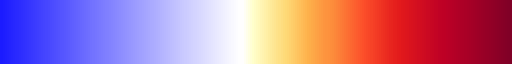

In [8]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap,ListedColormap


caxis_type = 'symlog'    # 'linear' or 'symlog'


array_to_plot = cell_impacts_varexp_latlon_grid
varexp_id = varexp_type


colorscale_min = np.nanmin(array_to_plot[~np.isinf(array_to_plot)])
colorscale_max = np.nanmax(array_to_plot[~np.isinf(array_to_plot)])
# min_max_ratio = np.abs(colorscale_min/colorscale_max)

# curr_cmap = mpl.colormaps['bwr']._resample(234)
# cmap_part1 = np.asarray(curr_cmap(range(int(np.round(117.5-(117*min_max_ratio))),118)))
# curr_cmap = mpl.colormaps['YlOrRd']._resample(256)
# cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,6),np.arange(60,120,4),np.arange(120,184,2),\
#                                           np.arange(184,220,1.5),np.arange(220,256,1)))/256))
# full_cmap = ListedColormap(np.vstack((cmap_part1,cmap_part2)))
# full_cmap

if caxis_type == 'symlog':
    # set up symlog norm-based colormap
    log_transition = 1.e-13
    neg_log_length = np.log(np.abs(colorscale_min/log_transition))
    pos_log_length = np.log(np.abs(colorscale_max/log_transition))
    total_length = neg_log_length + pos_log_length + 2
    neg_pos_ratio = np.abs((neg_log_length + 1)/(pos_log_length + 1))
elif caxis_type == 'linear':
    neg_pos_ratio = np.abs(colorscale_min/colorscale_max)

curr_cmap = mpl.colormaps['bwr'].resampled(262)
cmap_part1 = np.asarray(curr_cmap(range(int(np.round(131-(131*neg_pos_ratio))),132)))
curr_cmap = mpl.colormaps['YlOrRd'].resampled(256)
cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,4),np.arange(60,120,3),np.arange(120,184,2),\
                                          np.arange(184,220,1.5),np.arange(220,256,1)))/256))
cmap_taper_part2 = (np.reshape(np.arange(0.8,0,-0.2),(-1,1))*cmap_part1[[-1],:])\
                        + (np.reshape(np.arange(0.2,1,0.2),(-1,1))*cmap_part2[[0],:])
cmap_taper_part2[cmap_taper_part2 > 1] = 1
full_cmap = ListedColormap(np.vstack((cmap_part1,\
                                      cmap_part1[-1,:],\
                                      cmap_taper_part2,\
                                      cmap_part2)))
full_cmap

In [9]:
if caxis_type == 'symlog':
    # colorbar ticks
    exponents_min_side = np.arange(np.floor(np.log(np.abs(colorscale_min))/np.log(10)),\
                                   np.floor(np.log(log_transition)/np.log(10))-1,-1)
    exponents_max_side = np.arange(np.floor(np.log(log_transition)/np.log(10)),\
                                   np.ceil(np.log(np.abs(colorscale_max))/np.log(10)),1)
    curr_min_ticks = np.array([])
    for expo in exponents_min_side:
        curr_min_ticks = np.append(curr_min_ticks,-(np.arange(9,1,-1))*(10**expo))
    minor_ticks = curr_min_ticks[np.logical_and(curr_min_ticks >= colorscale_min,\
                                                                  curr_min_ticks <= -log_transition).nonzero()[0]]
    curr_max_ticks = np.array([])
    for expo in exponents_max_side:
        curr_max_ticks = np.append(curr_max_ticks,(np.arange(2,10,1))*(10**expo))
    minor_ticks = np.append(minor_ticks,\
                                      curr_max_ticks[np.logical_and(curr_max_ticks >= log_transition,\
                                                                  curr_max_ticks <= colorscale_max).nonzero()[0]])
    curr_min_ticks = np.array([])
    for expo in exponents_min_side:
        curr_min_ticks = np.append(curr_min_ticks,-(10**expo))
    major_ticks = curr_min_ticks[np.logical_and(curr_min_ticks >= colorscale_min,\
                                                  curr_min_ticks <= -log_transition).nonzero()[0]]
    major_ticks = np.append(major_ticks,0)
    curr_max_ticks = np.array([])
    for expo in exponents_max_side:
        curr_max_ticks = np.append(curr_max_ticks,10**expo)
    major_ticks = np.append(major_ticks,\
                                      curr_max_ticks[np.logical_and(curr_max_ticks >= log_transition,\
                                                                  curr_max_ticks <= colorscale_max).nonzero()[0]])

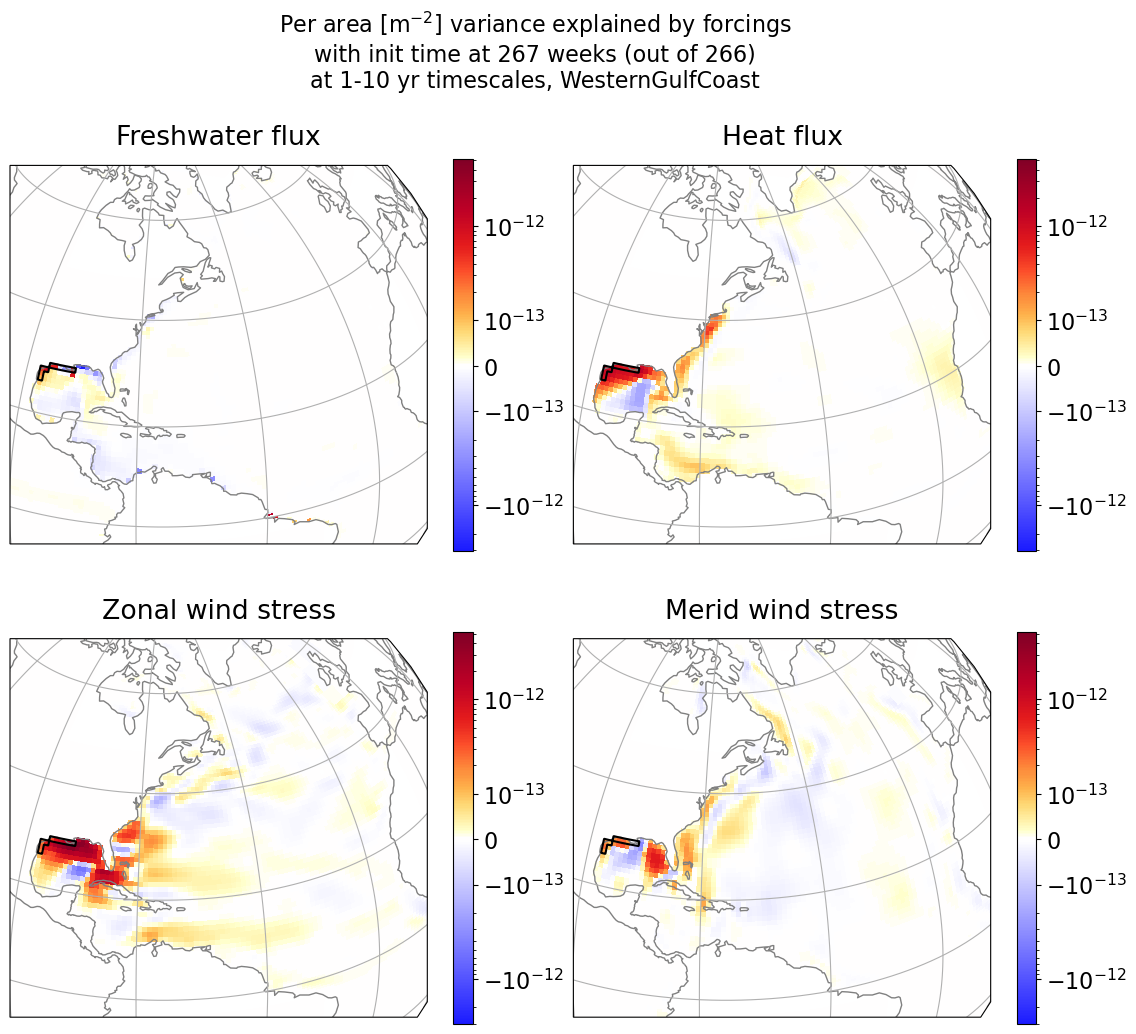

In [10]:
plt.rcParams['font.size'] = 16

fig,axs = plt.subplots(2,2,figsize=(14,12),\
                       subplot_kw={'projection':ccrs.Orthographic(central_longitude=-70,central_latitude=30)})
for (j_ax,i_ax),n_ax in np.ndenumerate(np.reshape(range(4),(2,2))):
    if caxis_type == 'symlog':
        cmap_norm = colors.SymLogNorm(linthresh=log_transition,linscale=1/np.log(10),\
                                                     vmin=colorscale_min,vmax=colorscale_max)
    elif caxis_type == 'linear':
        cmap_norm = colors.Normalize(vmin=colorscale_min,vmax=colorscale_max)
    curr_plot = axs[j_ax,i_ax].pcolormesh(lon_centers_grid,lat_centers_grid,array_to_plot[n_ax,:,:],\
                                          transform=ccrs.PlateCarree(),cmap=full_cmap,\
                                          norm=cmap_norm)
    if place_is_regionavg:
        axs[j_ax,i_ax].contour(lon_centers_grid,lat_centers_grid,mask_regionavg_latlon_grid,\
                               transform=ccrs.PlateCarree(),levels=[0.5],colors=[(0,0,0)])
    else:
        axs[j_ax,i_ax].plot(tidegauge_lon[place_id],tidegauge_lat[place_id],\
                            color=(0,0,0),marker='o',fillstyle='none',markersize=10,transform=ccrs.Geodetic())
    axs[j_ax,i_ax].set_extent([-100,-10,-5,65],ccrs.PlateCarree())
    axs[j_ax,i_ax].coastlines(color=(.5,.5,.5))
    axs[j_ax,i_ax].gridlines()
    forc_names = {'empmr':'Freshwater flux','qnet':'Heat flux','tauu':'Zonal wind stress','tauv':'Merid wind stress'}
    axs[j_ax,i_ax].set_title(forc_names[ds_varexp.forc.data[n_ax]],pad=15.0)
    curr_cbar = plt.colorbar(curr_plot,ax=axs[j_ax,i_ax],shrink=0.87)
    if caxis_type == 'symlog':
        curr_cbar.set_ticks(major_ticks,minor=False)
        curr_cbar.set_ticks(minor_ticks,minor=True)

plt.subplots_adjust(wspace=0.08,hspace=0.05)

# month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# if curr_month == None:
#     max_weeks_at_predmonth = 55
#     month_desc = 'all months'
#     month_file_id = 'allmonths'
# else:
#     max_weeks_at_predmonth = np.max((~np.isnan(ds_varexp.sens_time.values[curr_month-1,:])).nonzero()[0]) + 1
#     month_desc = 'pred month '+month_list[curr_month-1]
#     month_file_id = month_desc[-3:]
geom_case = cell_scheme.split('_')[-1]
if 'nest' not in geom_case:
    geom_case = ''
else:
    geom_case += '_'
if varexp_type == 'model':
    geom_case = predrange_id+'_modellead_'+geom_case
if np.abs(edge_handling_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
if per_area_opt == False:
    plt.suptitle('Fraction of variance explained by forcings\n'\
                    +'with init time at '+str(init_tstep+1)+' weeks (out of '\
                    +str(ds_varexp.sizes['sens_tval'])+')\n'\
                    +'at '+freq_range_name+' timescales, '+place_id,\
                fontsize=16)
    plt.savefig('Varexp_byforc_'+case_id+'_'+varexp_id+'_'+place_id+'_'+geom_case\
                +freq_range_name.replace(' ','')+edge_masked_str+'_init'+str(init_tstep+1)+'wks_'+year_range_id+'.png')
else:
    plt.suptitle('Per area [m$^{-2}$] variance explained by forcings\n'\
                    +'with init time at '+str(init_tstep+1)+' weeks (out of '\
                    +str(ds_varexp.sizes['sens_tval'])+')\n'\
                    +'at '+freq_range_name+' timescales, '+place_id,\
                fontsize=16)
    plt.savefig('Perarea_varexp_byforc_'+case_id+'_'+varexp_id+'_'+place_id+'_'+geom_case\
                +freq_range_name.replace(' ','')+edge_masked_str+'_init'+str(init_tstep+1)+'wks_'+year_range_id+'.png')
plt.show()

In [86]:
if per_area_opt == False:
    colorscale_min = np.nanmin(curr_allforc_varexp)
    colorscale_max = np.nanmax(curr_allforc_varexp)
    array_to_plot = cum_allforc_frac_varexp_latlon_grid
else:
    colorscale_min = np.nanmin(curr_allforc_varexp_perarea)
    colorscale_max = np.nanmax(curr_allforc_varexp_perarea)
    array_to_plot = cum_allforc_varexp_perarea_latlon_grid
min_max_ratio = np.abs(colorscale_min/colorscale_max)

curr_cmap = mpl.colormaps['bwr']._resample(234)
cmap_part1 = np.asarray(curr_cmap(range(int(np.round(117-(117*min_max_ratio))),128)))
curr_cmap = mpl.colormaps['YlOrRd']._resample(256)
cmap_part2 = np.asarray(curr_cmap(np.concatenate((np.arange(0,60,6),np.arange(60,120,4),np.arange(120,184,2),\
                                          np.arange(184,220,1.5),np.arange(220,256,1)))/256))
full_cmap = ListedColormap(np.vstack((cmap_part1,cmap_part2)))


fig,ax = plt.subplots(1,1,figsize=(12,10),\
                       subplot_kw={'projection':ccrs.Orthographic(central_longitude=-85,central_latitude=30)})
curr_plot = ax.pcolormesh(lon_centers_grid,lat_centers_grid,array_to_plot,\
                          transform=ccrs.PlateCarree(),cmap=full_cmap,\
                          norm=colors.SymLogNorm(linthresh=log_transition,\
                                                                 linscale=1/np.log(10),\
                                                                 vmin=colorscale_min,vmax=colorscale_max))
if place_is_regionavg:
    ax.contour(lon_centers_grid,lat_centers_grid,mask_regionavg_latlon_grid,\
                   transform=ccrs.PlateCarree(),levels=[0.5],colors=[(0,0,0)])
else:
    axplot(tidegauge_lon[place_id],tidegauge_lat[place_id],\
                color=(0,0,0),marker='o',fillstyle='none',markersize=10,transform=ccrs.Geodetic())
ax.set_extent([-110,-30,0,60],ccrs.PlateCarree())
ax.coastlines(color=(.5,.5,.5))
ax.gridlines()
plt.colorbar(curr_plot)

# month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# if curr_month == None:
#     max_weeks_at_predmonth = 55
#     month_desc = 'all months'
#     month_file_id = 'allmonths'
# else:
#     max_weeks_at_predmonth = np.max((~np.isnan(ds_varexp.sens_time.values[curr_month-1,:])).nonzero()[0]) + 1
#     month_desc = 'pred month '+month_list[curr_month-1]
#     month_file_id = month_desc[-3:]
geom_case = cell_scheme.split('_')[-1]
if 'nest' not in geom_case:
    geom_case = ''
else:
    geom_case += '_'
if varexp_type == 'model':
    geom_case = predrange_id+'_modellead_'+geom_case
if np.abs(edge_masked_opt) < 1.e-5:
    edge_masked_str = ''
else:
    edge_masked_str = '_edgemasked'
if perarea_opt == False:
    ax.set_title('Fraction of '+varexp_id+' variance explained by all forcings\n'\
                    +'cumulatively over '+str(init_tstep+1)+' weeks (out of '+str(max_weeks_at_predmonth)+')\n'\
                    +'at '+freq_range_name+' timescales, '+place_id,\
                fontsize=14)
    plt.savefig('Varexp_allforc_'+case_id+'_'+varexp_id+'_'+place_id+'_'+geom_case+'_'\
                +freq_range_name.replace(' ','')+edge_masked_str+'_cum'+str(init_tstep+1)+'wks_'+year_range_id+'.png')
else:
    ax.set_title('Per area [m$^{-2}$] variance of '+varexp_id+' explained by all forcings\n'\
                    +'cumulatively over '+str(init_tstep+1)+' weeks (out of '+str(max_weeks_at_predmonth)+')\n'\
                    +'at '+freq_range_name+' timescales, '+place_id,\
                fontsize=14)
    plt.savefig('Perarea_varexp_allforc_'+case_id+'_'+varexp_id+'_'+place_id+'_'+geom_case+'_'\
                +freq_range_name.replace(' ','')+edge_masked_str+'_cum'+str(init_tstep+1)+'wks_'+year_range_id+'.png')
plt.show()

NameError: name 'curr_allforc_varexp_perarea' is not defined

C:\Users\adelman\Documents\py_functions\filter_functions.py:320: RuntimeWarning: invalid value encountered in divide
  dim_vec_nomean = dim_vec_tiled - (np.sum(mask*dim_vec_tiled,axis=0)/np.sum(mask,axis=0))
C:\Users\adelman\Documents\py_functions\filter_functions.py:321: RuntimeWarning: invalid value encountered in divide
  input_mean = np.nansum(mask*input_reshaped,axis=0,keepdims=True)/np.nansum(mask,axis=0,keepdims=True)
C:\Users\adelman\Documents\py_functions\filter_functions.py:325: RuntimeWarning: invalid value encountered in divide
  reg_trend = (np.moveaxis(reg_num/reg_denom,0,axis))/delta_dim
C:\Users\adelman\AppData\Local\Temp\ipykernel_33116\88230085.py:51: RuntimeWarning: invalid value encountered in divide
  curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
C:\Users\adelman\Documents\py_functions\filter_functions.py:320: RuntimeWarning: invalid value encountered in divide
  dim_vec_nomean = dim_vec_tiled - (np.sum(mask*dim_vec_tiled,axis=0)/n

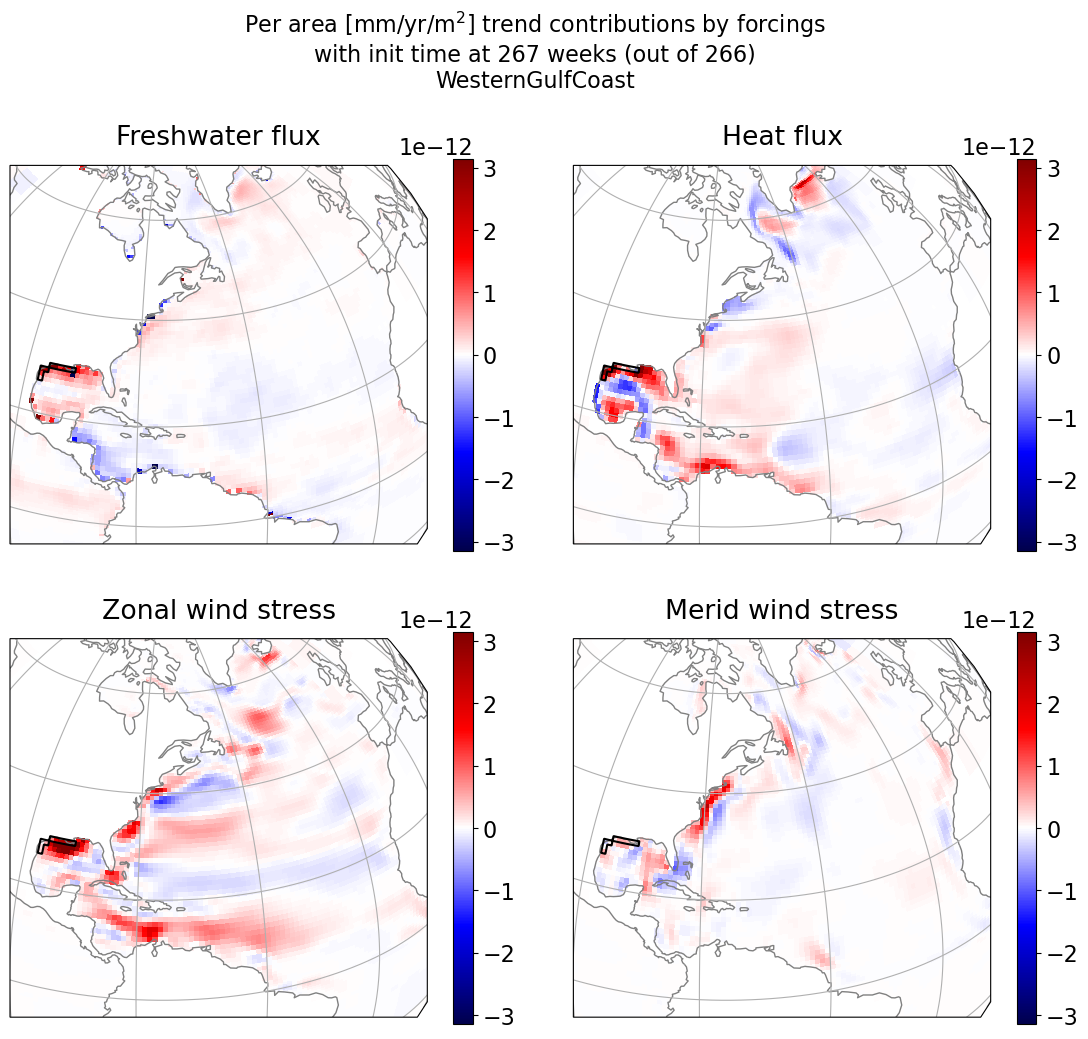

In [11]:
# maps of contributions to trend

trend_year_first = 2006
trend_year_last = 2017

if 'postinit_cell_impact_attimes' in ds_varexp:
    init_tstep = 0
else:
    init_tstep = ds_varexp.sizes['sens_tval']


trend_year_range_id = str(trend_year_first)+'_'+str(trend_year_last)


def cell_impacts_trend_compute(ds_varexp,trend_year_first,trend_year_last,init_tstep):
    # set initialization week/time step
    # init_tstep = ds_varexp.sizes['sens_tval'] - 53

    # constrain trend computation to specified time range
    pred_time_flattened = ds_varexp.pred_time.transpose('pred_year','pred_month').values.flatten()
    in_time_range = np.logical_and(pred_time_flattened >= np.datetime64(str(trend_year_first)+'-01-01','ns'),\
                                   pred_time_flattened < np.datetime64(str(trend_year_last+1)+'-01-01','ns'))\
                                    .nonzero()[0]
    cell_impacts = np.reshape(ds_varexp.preinit_cell_impact_attimes.isel(sens_tval=slice(0,init_tstep+1))\
                                  .sum('sens_tval').transpose('forc','pred_year','pred_month','cell')\
                                   .values,(ds_varexp.sizes['forc'],-1,ds_varexp.sizes['cell']))
    
    if (('postinit_cell_impact_attimes' in ds_varexp) and (init_tstep < ds_varexp.sizes['sens_tval'] - 1)):
        curr_latest_init_times = ds_varexp.forc_time.isel(sens_tval=init_tstep) + np.timedelta64(6,'D')
        init_times_attstep = ds_varexp.postinit_init_time.where((ds_varexp_tpostinit_init_time - curr_latest_init_times)\
                                      .values <= np.timedelta64(0,'D'),np.datetime64('1900-01-01','ns'))
        closest_init_time = init_times_attstep.max(dim=['lead_num','sens_tval'])
        closest_init_time_mask = (np.abs(ds_varexp.postinit_init_time - closest_init_time) < np.timedelta64(1,'D'))
        postinit_cell_impacts = np.reshape((closest_init_time_mask*ds_varexp.postinit_cell_impact_attimes)\
                                                    .isel(sens_tval=slice(init_tstep+1,None))\
                                                    .sum(['lead_num','sens_tval'])\
                                                    .transpose('forc','pred_year','pred_month','cell').values,\
                                    (ds_varexp.sizes['forc'],-1,ds_varexp.sizes['cell']))
        
        cell_impacts += postinit_cell_impacts

    cell_impacts = cell_impacts[:,in_time_range,:]
    
    cell_impacts_trend_per_yr = trend_compute(cell_impacts,axis=1,delta_dim=1/12)[:,0,:]
    

    return cell_impacts_trend_per_yr


def normalize_perarea(curr_array,ds_varexp):
    curr_array_perarea = curr_array/np.expand_dims(ds_varexp.rA_cell.values,axis=0)
    return curr_array_perarea

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cell_impacts_trend_per_yr = cell_impacts_trend_compute(ds_varexp,trend_year_first,trend_year_last,init_tstep)
    cell_impacts_allforc_trend_per_yr = np.nansum(cell_impacts_trend_per_yr,axis=0)
    
    if per_area_opt:
        cell_impacts_trend_per_yr = normalize_perarea(cell_impacts_trend_per_yr,ds_varexp)
        cell_impacts_allforc_trend_per_yr = normalize_perarea(cell_impacts_allforc_trend_per_yr,ds_varexp)


cell_impacts_trend_per_yr_ecco_grid = np.empty(cell_impacts_trend_per_yr.shape[:-1]\
                                                          +ds_varexp.cell_indexing.shape)
cell_impacts_allforc_trend_per_yr_ecco_grid = np.empty(cell_impacts_allforc_trend_per_yr.shape[:-1]\
                                                              +ds_varexp.cell_indexing.shape)

# regrid to standard llc90 cells (rather than aggregated cells)
for cell_ind in range(ds_varexp.sizes['cell']):
    ecco_grid_ind = (ds_varexp.cell_indexing.values == cell_ind).nonzero()
    cell_impacts_trend_per_yr_ecco_grid[(slice(None),)+ecco_grid_ind]\
                                    = cell_impacts_trend_per_yr[:,[cell_ind]]
    cell_impacts_allforc_trend_per_yr_ecco_grid[(slice(None),)+ecco_grid_ind]\
                                    = cell_impacts_allforc_trend_per_yr[:,[cell_ind]]


# fill in values from supplemental stores/archives
for store in supplemental_store_list:
    ds_curr = xr.open_mfdataset(store,engine='zarr')
    curr_ind_tuple = supplemental_ind_tuples_dict[store]

    curr_cell_impacts_trend_per_yr = cell_impacts_trend_compute(ds_curr,trend_year_first,trend_year_last,init_tstep)
    curr_cell_impacts_allforc_trend_per_yr = np.nansum(curr_cell_impacts_trend_per_yr,axis=0)
    
    if per_area_opt:
        curr_cell_impacts_trend_per_yr = normalize_perarea(curr_cell_impacts_trend_per_yr,ds_curr)
        curr_cell_impacts_allforc_trend_per_yr = normalize_perarea(curr_cell_impacts_allforc_trend_per_yr,ds_curr)
    
    cell_impacts_trend_per_yr_ecco_grid[(slice(None),)+curr_ind_tuple]\
                                            = curr_cell_impacts_trend_per_yr[:,:len(curr_ind_tuple[0])]
    cell_impacts_allforc_trend_per_yr_ecco_grid[(slice(None),)+curr_ind_tuple]\
                                            = curr_cell_impacts_allforc_trend_per_yr[:,:len(curr_ind_tuple[0])]


if place_is_regionavg:
    # indicate region of control function
    mask_unshaped = np.fromfile(join(expanduser('~'),'Downloads','ECCO_v4r4_adjoint',\
                                     'adjoint_sensitivities',place_id,\
                                'mask_'+place_id+'.bin'),dtype='>f4')
    mask_regionavg = np.empty((13,90,90)).astype('float32')
    mask_regionavg[:7,:,:] = np.reshape(mask_unshaped[:(7*90*90)],(7,90,90))
    mask_rot = np.reshape(mask_unshaped[(7*90*90):],(180,270))
    for tile_ind in range(7,10):
        mask_regionavg[tile_ind,:,:] = mask_rot[:90,90*(tile_ind-7):90*(tile_ind-6)]
    for tile_ind in range(10,13):
        mask_regionavg[tile_ind,:,:] = mask_rot[90:,90*(tile_ind-10):90*(tile_ind-9)]
    

# regrid to fine lat/lon grid for plotting maps

import ecco_v4_py as ecco

cell_impacts_trend_per_yr_latlon_grid = np.empty(cell_impacts_trend_per_yr_ecco_grid.shape[:-3]+(1800,3600))
for forc_num in range(cell_impacts_trend_per_yr_ecco_grid.shape[0]):
    lon_centers_grid,lat_centers_grid,\
    lon_edges_grid,lat_edges_grid,\
    cell_impacts_trend_per_yr_latlon_grid[forc_num,:,:] = \
                                    ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
                                                              cell_impacts_trend_per_yr_ecco_grid[forc_num,:,:,:],\
                                                              new_grid_min_lat=-90,new_grid_max_lat=90,\
                                                              new_grid_delta_lat=.1,\
                                                              new_grid_min_lon=-180,new_grid_max_lon=180,\
                                                              new_grid_delta_lon=.1,\
                                                              mapping_method='nearest_neighbor')

if place_is_regionavg:
    mask_regionavg_latlon_grid = ecco.resample_to_latlon(ds_varexp.XC.values,ds_varexp.YC.values,\
                                                          mask_regionavg,\
                                                          new_grid_min_lat=-90,new_grid_max_lat=90,\
                                                          new_grid_delta_lat=.1,\
                                                          new_grid_min_lon=-180,new_grid_max_lon=180,\
                                                          new_grid_delta_lon=.1,\
                                                          mapping_method='nearest_neighbor')[-1]


# define color scale limits
frac_outside_lim = 0.002

trend_per_yr_abssorted = np.sort(np.abs(cell_impacts_trend_per_yr.flatten()))
trend_per_yr_abssorted = trend_per_yr_abssorted[~np.isnan(trend_per_yr_abssorted)]
trend_per_yr_lim = trend_per_yr_abssorted[int((1 - frac_outside_lim)*len(trend_per_yr_abssorted))]
colorscale_min = -trend_per_yr_lim
colorscale_max = trend_per_yr_lim

array_to_plot = cell_impacts_trend_per_yr_latlon_grid

import cartopy.crs as ccrs


plt.rcParams['font.size'] = 16

fig,axs = plt.subplots(2,2,figsize=(14,12),\
                       subplot_kw={'projection':ccrs.Orthographic(central_longitude=-70,central_latitude=30)})
for (j_ax,i_ax),n_ax in np.ndenumerate(np.reshape(range(4),(2,2))):
    curr_plot = axs[j_ax,i_ax].pcolormesh(lon_centers_grid,lat_centers_grid,(1.e3)*array_to_plot[n_ax,:,:],\
                                          transform=ccrs.PlateCarree(),cmap='seismic',\
                                          vmin=(1.e3)*colorscale_min,vmax=(1.e3)*colorscale_max)
    if place_is_regionavg:
        axs[j_ax,i_ax].contour(lon_centers_grid,lat_centers_grid,mask_regionavg_latlon_grid,\
                               transform=ccrs.PlateCarree(),levels=[0.5],colors=[(0,0,0)])
    else:
        axs[j_ax,i_ax].plot(tidegauge_lon[place_id],tidegauge_lat[place_id],\
                            color=(0,0,0),marker='o',fillstyle='none',markersize=10,transform=ccrs.Geodetic())
    axs[j_ax,i_ax].set_extent([-100,-10,-5,65],ccrs.PlateCarree())
    axs[j_ax,i_ax].coastlines(color=(.5,.5,.5))
    axs[j_ax,i_ax].gridlines()
    forc_names = {'empmr':'Freshwater flux','qnet':'Heat flux','tauu':'Zonal wind stress','tauv':'Merid wind stress'}
    axs[j_ax,i_ax].set_title(forc_names[ds_varexp.forc.data[n_ax]],pad=15.0)
    curr_cbar = plt.colorbar(curr_plot,ax=axs[j_ax,i_ax],shrink=0.87)
    # if caxis_type == 'symlog':
    #     curr_cbar.set_ticks(major_ticks,minor=False)
    #     curr_cbar.set_ticks(minor_ticks,minor=True)

plt.subplots_adjust(wspace=0.08,hspace=0.05)

# month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# if curr_month == None:
#     max_weeks_at_predmonth = 55
#     month_desc = 'all months'
#     month_file_id = 'allmonths'
# else:
#     max_weeks_at_predmonth = np.max((~np.isnan(ds_varexp.sens_time.values[curr_month-1,:])).nonzero()[0]) + 1
#     month_desc = 'pred month '+month_list[curr_month-1]
#     month_file_id = month_desc[-3:]
geom_case = cell_scheme.split('_')[-1]
if 'nest' not in geom_case:
    geom_case = ''
else:
    geom_case += '_'
if varexp_type == 'model':
    geom_case = predrange_id+'_modellead_'+geom_case
if per_area_opt == False:
    plt.suptitle('Trend contributions by forcings\n'\
                    +'with init time at '+str(init_tstep+1)+' weeks (out of '\
                    +str(ds_varexp.sizes['sens_tval'])+')\n'\
                    +place_id,\
                fontsize=16)
    plt.savefig('Trend_byforc_'+case_id+'_'+place_id+'_'+geom_case\
                +'init'+str(init_tstep+1)+'wks_'+trend_year_range_id+'.png')
else:
    plt.suptitle('Per area [mm/yr/m$^2$] trend contributions by forcings\n'\
                    +'with init time at '+str(init_tstep+1)+' weeks (out of '\
                    +str(ds_varexp.sizes['sens_tval'])+')\n'\
                    +place_id,\
                fontsize=16)
    plt.savefig('Perarea_trend_byforc_'+case_id+'_'+place_id+'_'+geom_case\
                +'init'+str(init_tstep+1)+'wks_'+trend_year_range_id+'.png')
plt.show()